## 練習時間

請觀看李宏毅教授以神奇寶貝進化 CP 值預測的範例，解說何謂機器學習與過擬合。並回答以下問題

[youtube](https://www.youtube.com/watch?v=fegAeph9UaA)

### 1. 模型的泛化能力 (generalization) 是指什麼？ 

#### Ans:
#### 泛化能力是指機器學習模型對新鮮樣本的適應能力  學習的目的是學到隱含在數據背後的規律，對具有同一規律的學習集以外的數據，經過訓練的網絡也能給出合適的輸出，該能力稱為泛化能力。
---------------------------------------------------

### 2. 分類問題與回歸問題分別可用的目標函數有哪些？

#### Regression metrics: 
 - ***explained_variance_score(y_true, y_pred)***	Explained variance regression score function
 - ***max_error(y_true, y_pred)***	max_error metric calculates the maximum residual error.
 - ***mean_absolute_error(y_true, y_pred)***	Mean absolute error regression loss
 - ***mean_squared_error(y_true, y_pred[, …])***	Mean squared error regression loss
 - ***mean_squared_log_error(y_true, y_pred)***	Mean squared logarithmic error regression loss
 - ***median_absolute_error(y_true, y_pred)***	Median absolute error regression loss
 - ***r2_score(y_true, y_pred[, …])***	R^2 (coefficient of determination) regression score function.

#### Classification metrics:
 - ***accuracy_score(y_true, y_pred[, …]***  Accuracy classification score.
 - ***auc(x, y[, reorder]***  Compute Area Under the Curve (AUC) using the trapezoidal rule
 - ***average_precision_score(y_true, y_score***  Compute average precision (AP) from prediction scores
 - ***balanced_accuracy_score(y_true, y_pred***  Compute the balanced accuracy
 - ***brier_score_loss(y_true, y_prob[, …]***  Compute the Brier score.
 - ***classification_report(y_true, y_pred***  Build a text report showing the main classification metrics
 - ***cohen_kappa_score(y1, y2[, labels, …]***  Cohen’s kappa: a statistic that measures inter-annotator agreement.
 - ***confusion_matrix(y_true, y_pred[, …]***  Compute confusion matrix to evaluate the accuracy of a classification
 - ***f1_score(y_true, y_pred[, labels, …]***  Compute the F1 score, also known as balanced F-score or F-measure
 - ***fbeta_score(y_true, y_pred, beta[, …]***  Compute the F-beta score
 - ***hamming_loss(y_true, y_pred[, …]***  Compute the average Hamming loss.
 - ***hinge_loss(y_true, pred_decision[, …]***  Average hinge loss (non-regularized)
 - ***jaccard_score(y_true, y_pred[, …]***  Jaccard similarity coefficient score
 - ***log_loss(y_true, y_pred[, eps, …]***  Log loss, aka logistic loss or cross-entropy loss.
 - ***matthews_corrcoef(y_true, y_pred[, …]***  Compute the Matthews correlation coefficient (MCC)
 - ***multilabel_confusion_matrix(y_true, …***  Compute a confusion matrix for each class or sample
 - ***precision_recall_curve(y_true, …***  Compute precision-recall pairs for different probability thresholds
 - ***precision_recall_fscore_support(…***  Compute precision, recall, F-measure and support for each class
 - ***precision_score(y_true, y_pred[, …]***  Compute the precision
 - ***recall_score(y_true, y_pred[, …]***  Compute the recall
 - ***roc_auc_score(y_true, y_score[, …]***  Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
 - ***roc_curve(y_true, y_score[, …]***  Compute Receiver operating characteristic (ROC)
 - ***zero_one_loss(y_true, y_pred[, …]***  Zero-one classification loss.

# PlayGround

###  機器學習老中醫：利用學習曲線診斷模型的偏差和方差 ([link](http://bangqu.com/yjB839.html))

In [17]:
import pandas as pd
from zipfile import ZipFile
from io import BytesIO
import requests

def get_CCPP_dataFrame():
    content = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/00294/CCPP.zip').content
    zf = ZipFile(BytesIO(content))
    return pd.read_excel(BytesIO(zf.read('CCPP/Folds5x2_pp.xlsx')))

In [19]:
electricity  = get_CCPP_dataFrame()
print(electricity.info())
electricity.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.8 KB
None


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

train_sizes = [1, 100, 500, 2000, 5000, 7654]

features = ['AT', 'V', 'AP', 'RH']
target = 'PE'

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=LinearRegression(), 
    X=electricity[features],
    y=electricity[target], 
    train_sizes=train_sizes, 
    cv=5,
    scoring='neg_mean_squared_error')

print('Training Scores:\n',  train_scores)
print('-'*70)
print('Validation Scores Scores:\n',  validation_scores)
    

Training Scores:
 [[ -0.          -0.          -0.          -0.          -0.        ]
 [-19.71230701 -18.31492642 -18.31492642 -18.31492642 -18.31492642]
 [-18.14420459 -19.63885072 -19.63885072 -19.63885072 -19.63885072]
 [-21.53603444 -20.18568787 -19.98317419 -19.98317419 -19.98317419]
 [-20.47708899 -19.93364211 -20.56091569 -20.4150839  -20.4150839 ]
 [-20.98565335 -20.63006094 -21.04384703 -20.63526811 -20.52955609]]
----------------------------------------------------------------------
Validation Scores Scores:
 [[-619.30514723 -379.81090366 -374.4107861  -370.03037109 -373.30597982]
 [ -21.80224219  -23.01103419  -20.81350389  -22.88459236  -23.44955492]
 [ -19.96005238  -21.2771561   -19.75136596  -21.4325615   -21.89067652]
 [ -19.92863783  -21.35440062  -19.62974239  -21.38631648  -21.811031  ]
 [ -19.88806264  -21.3183303   -19.68228562  -21.35019525  -21.75949097]
 [ -19.9046791   -21.33448781  -19.67831137  -21.31935146  -21.73778949]]


In [29]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print(f'Mean training scores\n\n{pd.Series(train_scores_mean, index = train_sizes)}')
print(f'\n---\nMean validation scores\n\n{pd.Series(validation_scores_mean, index = train_sizes)}')

Mean training scores

1       -0.000000
100     18.594403
500     19.339921
2000    20.334249
5000    20.360363
7654    20.764877
dtype: float64

---
Mean validation scores

1       423.372638
100      22.392186
500      20.862362
2000     20.822026
5000     20.799673
7654     20.794924
dtype: float64


(0, 40)

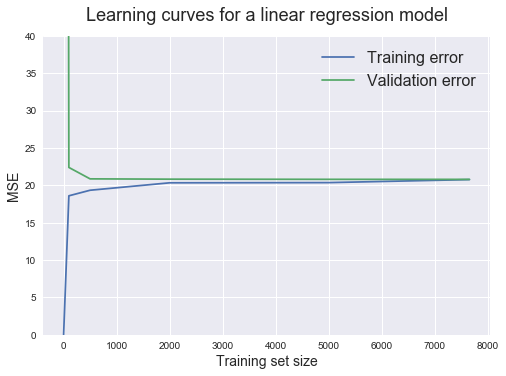

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend(fontsize=16)
plt.ylim(0,40)

從 500 個數據點開始，驗證集的 MSE 能夠保持大致不變。這給我們一個重要信息：增加更多的訓練數據點也不會帶來更好的模型。所以與其浪費時間（金錢）來收集數據，我們更需要的是做點其他事情，例如嘗試一下能夠構建更加複雜模型的算法。

![Alt text](http://i1.bangqu.com/j/news/20180123/89edbff69a834fc6a09357730be3d37b.png)



爲了找到這個答案，我們需要注意一下訓練誤差。如果訓練誤差特別小，這就說明估計模型能夠很好地擬合訓練數據，這就是說模型在對應的數據集上有較小的 bias。

![Alt text](http://i1.bangqu.com/j/news/20180123/bfe60571bf784dd7a43c4f44c49e3b28.png)


------------------
#### 現在讓我們診斷一下最終的 variance 問題。對 variance 的估計可以通過以下兩種方式完成：

通過檢查驗證學習曲線和訓練學習曲線之間的差距；
通過檢查訓練誤差：檢查誤差的值隨着訓練樣本數增加的變化。
![Alt text](http://i1.bangqu.com/j/news/20180123/1ba88a6278914269821529f9ec94b5f7.png)